# Premiere League Data Analysis

## Introduction

#### This project aims to analyze  Premier League data to understand team and player performance through various statistics. The dataset includes player names, teams, nationalities, ages, playing minutes, goals, assists, shots, cards, dribbles, and many other indicators that help assess individual and collective performance.

Through this analysis, insights will be extracted to answer questions such as:
- What are the most influential factors in goal scoring?
- How do passes and dribbles impact player performance?
- Which teams excel in defense or attack based on available data?
- Can player performance in upcoming matches be predicted using historical data?
Using data analysis tools and statistical visualizations, accurate and useful results will be provided that can be used by football fans, sports analysts, and even coaches to develop playing strategies.
If you want to add more details or adjust the style, let me know and I'll help!


In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the dataset and take an initial look
df = pd.read_csv('player_stats.csv') 

# Display the first few rows to understand the structure
df.head()


,Player,Team,#,Nation,Position,Age,Minutes,Goals,Assists,Penalty Shoot on Goal,...,Goal-Creating Actions,Passes Completed,Passes Attempted,Pass Completion %,Progressive Passes,Carries,Progressive Carries,Dribble Attempts,Successful Dribbles,Date
0,Bruno Fernandes,Manchester United,8,POR,"FW,AM",29-343,90,0,0,0,...,0,43,60,"71,7",6,50,7,1,1,2024-08-16
1,Marcus Rashford,Manchester United,10,ENG,LW,26-290,90,0,0,0,...,0,22,30,"73,3",2,34,2,6,0,2024-08-16
2,Amad Diallo,Manchester United,16,CIV,RW,22-036,60,0,0,0,...,0,28,33,"84,8",1,22,0,1,1,2024-08-16
3,Alejandro Garnacho,Manchester United,17,ARG,RW,20-046,30,0,1,0,...,1,10,11,"90,9",0,11,2,2,0,2024-08-16
4,Mason Mount,Manchester United,7,ENG,AM,25-219,60,0,0,0,...,0,11,15,"73,3",1,16,0,2,0,2024-08-16


In [3]:
# Check the shape of the dataset (rows, columns)
df.shape

(4270, 33)

In [4]:
# Check for missing values
df.isna().sum()

Player                     0
Team                       0
#                          0
Nation                     0
Position                   0
Age                        0
Minutes                    0
Goals                      0
Assists                    0
Penalty Shoot on Goal      0
Penalty Shoot              0
Total Shoot                0
Shoot on Target            0
Yellow Cards               0
Red Cards                  0
Touches                    0
Dribbles                   0
Tackles                    0
Blocks                     0
Expected Goals (xG)        0
Non-Penalty xG (npxG)      0
Expected Assists (xAG)     0
Shot-Creating Actions      0
Goal-Creating Actions      0
Passes Completed           0
Passes Attempted           0
Pass Completion %         46
Progressive Passes         0
Carries                    0
Progressive Carries        0
Dribble Attempts           0
Successful Dribbles        0
Date                       0
dtype: int64

In [5]:
# View basic info about columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4270 entries, 0 to 4269
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player                  4270 non-null   object 
 1   Team                    4270 non-null   object 
 2   #                       4270 non-null   int64  
 3   Nation                  4270 non-null   object 
 4   Position                4270 non-null   object 
 5   Age                     4270 non-null   object 
 6   Minutes                 4270 non-null   int64  
 7   Goals                   4270 non-null   int64  
 8   Assists                 4270 non-null   int64  
 9   Penalty Shoot on Goal   4270 non-null   int64  
 10  Penalty Shoot           4270 non-null   int64  
 11  Total Shoot             4270 non-null   int64  
 12  Shoot on Target         4270 non-null   int64  
 13  Yellow Cards            4270 non-null   int64  
 14  Red Cards               4270 non-null   

In [6]:
# View basic statistics for numerical columns
df.describe()

,#,Minutes,Goals,Assists,Penalty Shoot on Goal,Penalty Shoot,Total Shoot,Shoot on Target,Yellow Cards,Red Cards,...,Expected Assists (xAG),Shot-Creating Actions,Goal-Creating Actions,Passes Completed,Passes Attempted,Progressive Passes,Carries,Progressive Carries,Dribble Attempts,Successful Dribbles
count,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,...,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000,4270.000000
mean,16.780094,64.775410,0.094145,0.071194,0.005855,0.007260,0.868384,0.296019,0.161593,0.004918,...,0.072482,1.548946,0.166276,26.152927,32.061593,2.456206,22.330445,1.236300,1.215925,0.533255
std,12.215586,31.251815,0.326883,0.271362,0.085014,0.092814,1.241323,0.625048,0.373803,0.069964,...,0.167391,1.856990,0.458118,20.604004,22.945436,2.745780,16.012547,1.760593,1.742428,0.963710
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,13.000000,0.000000,10.000000,0.000000,0.000000,0.000000
50%,15.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,22.000000,29.000000,2.000000,20.000000,1.000000,1.000000,0.000000
75%,24.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.100000,2.000000,0.000000,38.000000,46.000000,4.000000,31.000000,2.000000,2.000000,1.000000
max,87.000000,90.000000,4.000000,3.000000,3.000000,3.000000,8.000000,5.000000,2.000000,1.000000,...,1.600000,16.000000,6.000000,127.000000,140.000000,30.000000,106.000000,18.000000,16.000000,12.000000


In [7]:
# Create a backup copy of the original dataset to preserve the raw data
df_original = df.copy()

## ---- Data Cleaning ----

In [8]:
# Check for missing values in each column
df.isna().sum()

Player                     0
Team                       0
#                          0
Nation                     0
Position                   0
Age                        0
Minutes                    0
Goals                      0
Assists                    0
Penalty Shoot on Goal      0
Penalty Shoot              0
Total Shoot                0
Shoot on Target            0
Yellow Cards               0
Red Cards                  0
Touches                    0
Dribbles                   0
Tackles                    0
Blocks                     0
Expected Goals (xG)        0
Non-Penalty xG (npxG)      0
Expected Assists (xAG)     0
Shot-Creating Actions      0
Goal-Creating Actions      0
Passes Completed           0
Passes Attempted           0
Pass Completion %         46
Progressive Passes         0
Carries                    0
Progressive Carries        0
Dribble Attempts           0
Successful Dribbles        0
Date                       0
dtype: int64

In [9]:
# Clean 'Pass Completion %' column:
# - Replace commas with dots
# - Convert to float
# - Fill missing values with column mean
df['Pass Completion %'] = df['Pass Completion %'].str.replace(',', '.')
df['Pass Completion %'] = df['Pass Completion %'].astype(float)
df['Pass Completion %'].fillna(df['Pass Completion %'].mean(), inplace=True)

In [10]:
# Rename '#' column to 'NUM' for clarity
df.rename(columns={'#': 'NUM'}, inplace=True)

In [11]:
# Split the 'Age' column on '-' and keep only the first part (the actual age)
# Removing extra text after '-' (e.g., '29-343' -> '29')
df['Age'] = df['Age'].str.split('-').str[0]

# Convert the cleaned 'Age' column to integer type
df['Age'] = df['Age'].astype(int)

In [12]:
# Extract the primary position from the list by keeping only the first value
df['Position'] = df['Position'].str.strip().str.split(',').str[0]

In [13]:
# convert Date column to datetime and  change format to be month day year 
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')



#  Exploratory Data Analysis (EDA)



##### In this section, we explore the dataset to uncover patterns, trends, and relationships.
#### This includes analyzing distributions, top performers, correlations, and team-level statistics.
##### Visualizations will be used to support understanding of player and team performance.


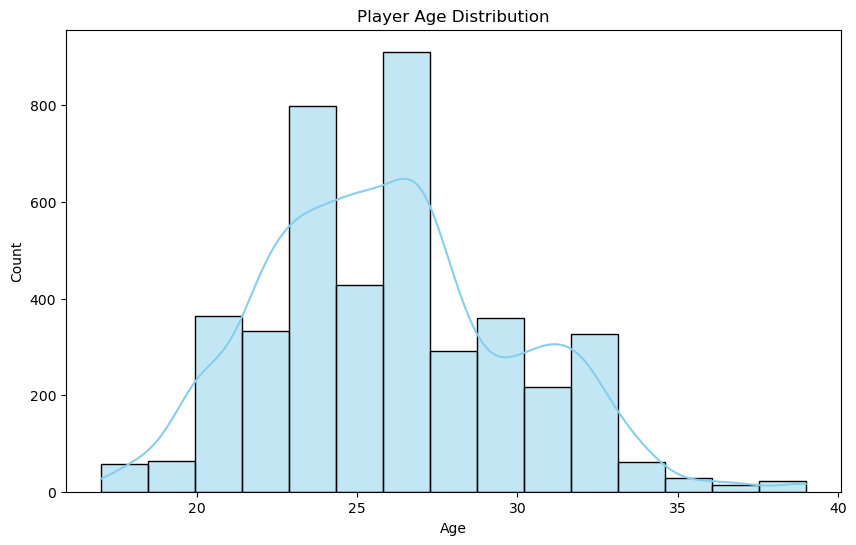

In [14]:
# Age distribution 

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Player Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


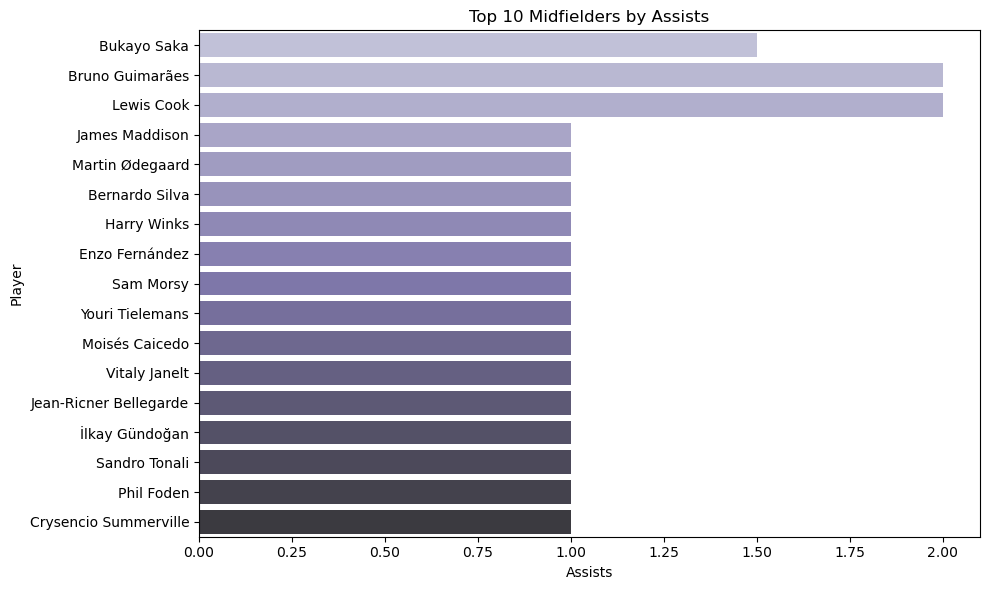

In [15]:
# Top 20 Midfielders with the Most Assists
# Filter midfielders only
midfield_roles = ['DM', 'CM', 'LM', 'RM']
midfielders = df[df['Position'].isin(midfield_roles)]

# Sort by Assists
top_mf_assists = midfielders.sort_values(by='Assists', ascending=False).head(20)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_mf_assists, x='Assists', y='Player', palette='Purples_d', ci=None)
plt.title('Top 10 Midfielders by Assists')
plt.xlabel('Assists')
plt.ylabel('Player')
plt.tight_layout()
plt.show()


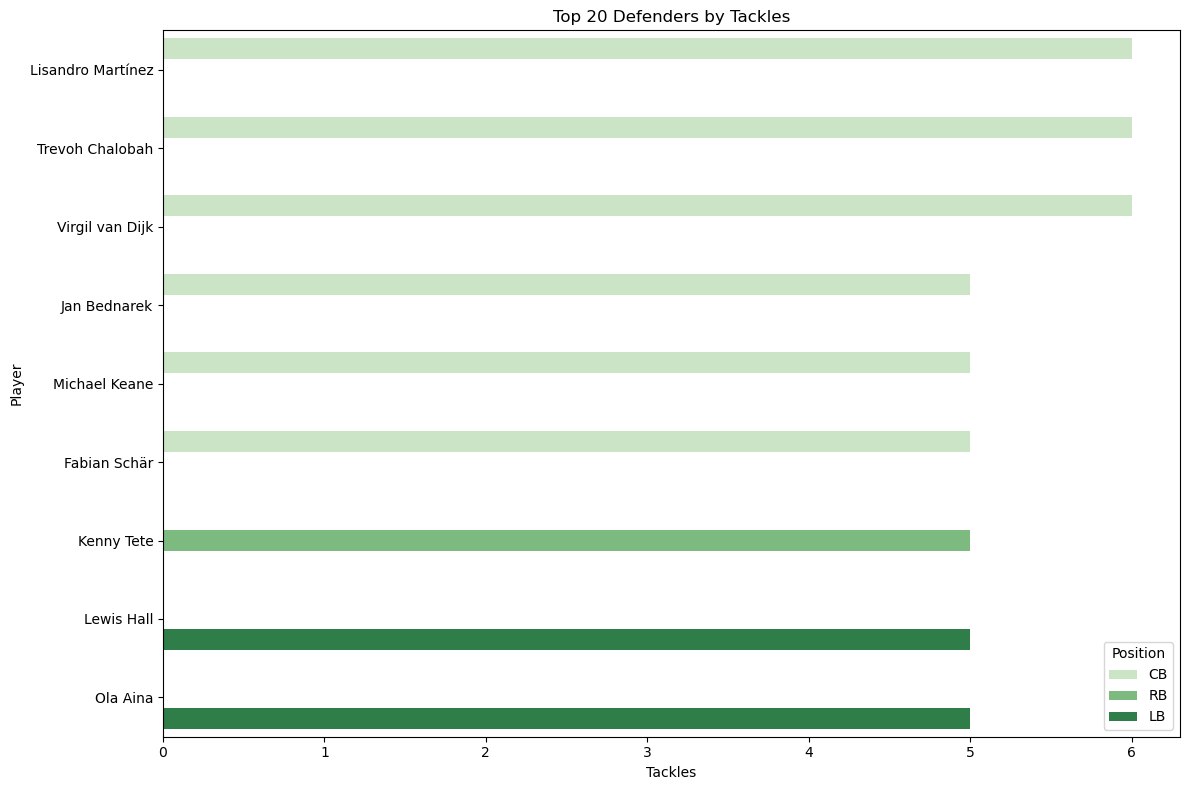

In [16]:
# Top 20 Defenders by Tackles

# Define defender positions
defensive_roles = ['RB', 'LB', 'CB', 'WB']

# Filter for defenders
defenders = df[df['Position'].isin(defensive_roles)]

# Sort by Tackles
top_defenders = defenders.sort_values(by='Tackles', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_defenders,
    x='Tackles',
    y='Player',
    hue='Position',
    palette='Greens',
    errorbar=None
)
plt.title('Top 20 Defenders by Tackles')
plt.xlabel('Tackles')
plt.ylabel('Player')
plt.legend(title='Position')
plt.tight_layout()
plt.show()

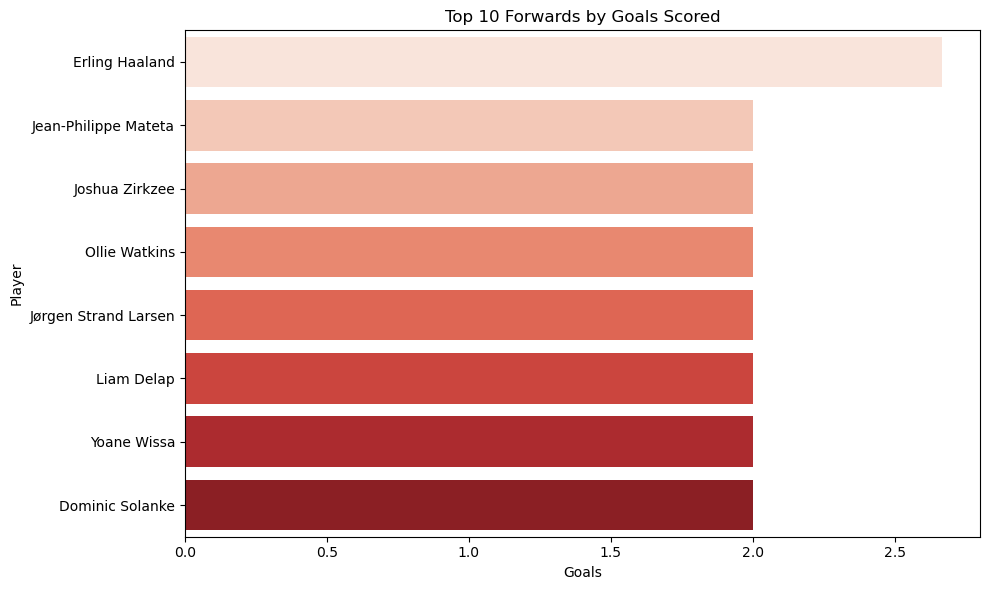

In [17]:
# Filter only Forwards

forwards = df[df['Position'] == 'FW']

#Sort by Goals
top_scorers = forwards.sort_values(by='Goals', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_scorers,
    x='Goals',
    y='Player',
    palette='Reds',
    errorbar=None
)
plt.title('Top 10 Forwards by Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Player')
plt.tight_layout()
plt.show()


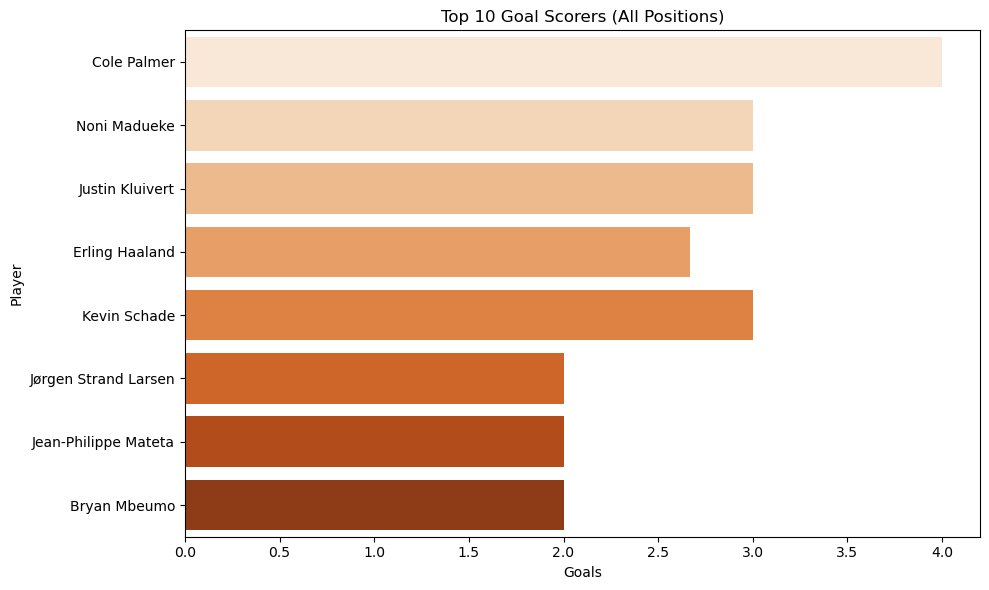

In [18]:
# The League's Top Scorer
# Sort the entire DataFrame by 'Goals' in descending order to get the top scorers
top_10_scorers = df.sort_values(by='Goals', ascending=False).head(10)

# Create a horizontal bar plot to visualize the top 10 players by goals scored
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Draw the barplot with player names on the y-axis and their goal count on the x-axis
sns.barplot(
    data=top_10_scorers,
    x='Goals',
    y='Player',
    palette='Oranges',     # Set a warm orange color palette
    errorbar=None          # Disable confidence intervals to keep it clean
)

# Add a descriptive title and axis labels
plt.title('Top 10 Goal Scorers (All Positions)')
plt.xlabel('Goals')
plt.ylabel('Player')

# Adjust layout to prevent overlapping or cutting off labels
plt.tight_layout()

# Show the final plot
plt.show()

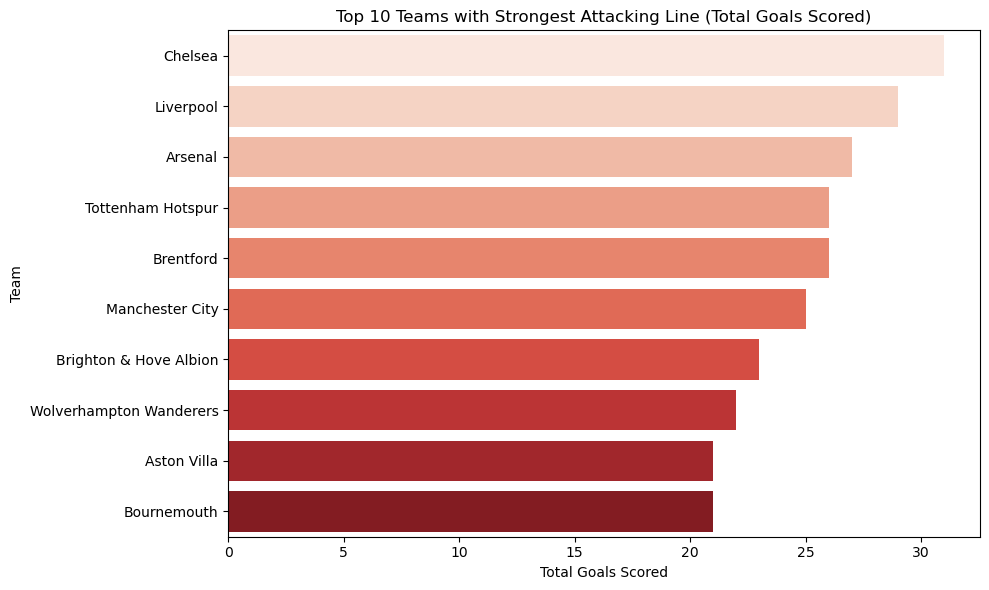

In [19]:
# Strongest Attacking Teams
# The team with the highest number of goals scored is considered to have the strongest attacking line.

top_attacking_teams = df.groupby('Team')['Goals'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_attacking_teams.values, y=top_attacking_teams.index, palette='Reds')
plt.title('Top 10 Teams with Strongest Attacking Line (Total Goals Scored)')
plt.xlabel('Total Goals Scored')
plt.ylabel('Team')
plt.tight_layout()
plt.show()


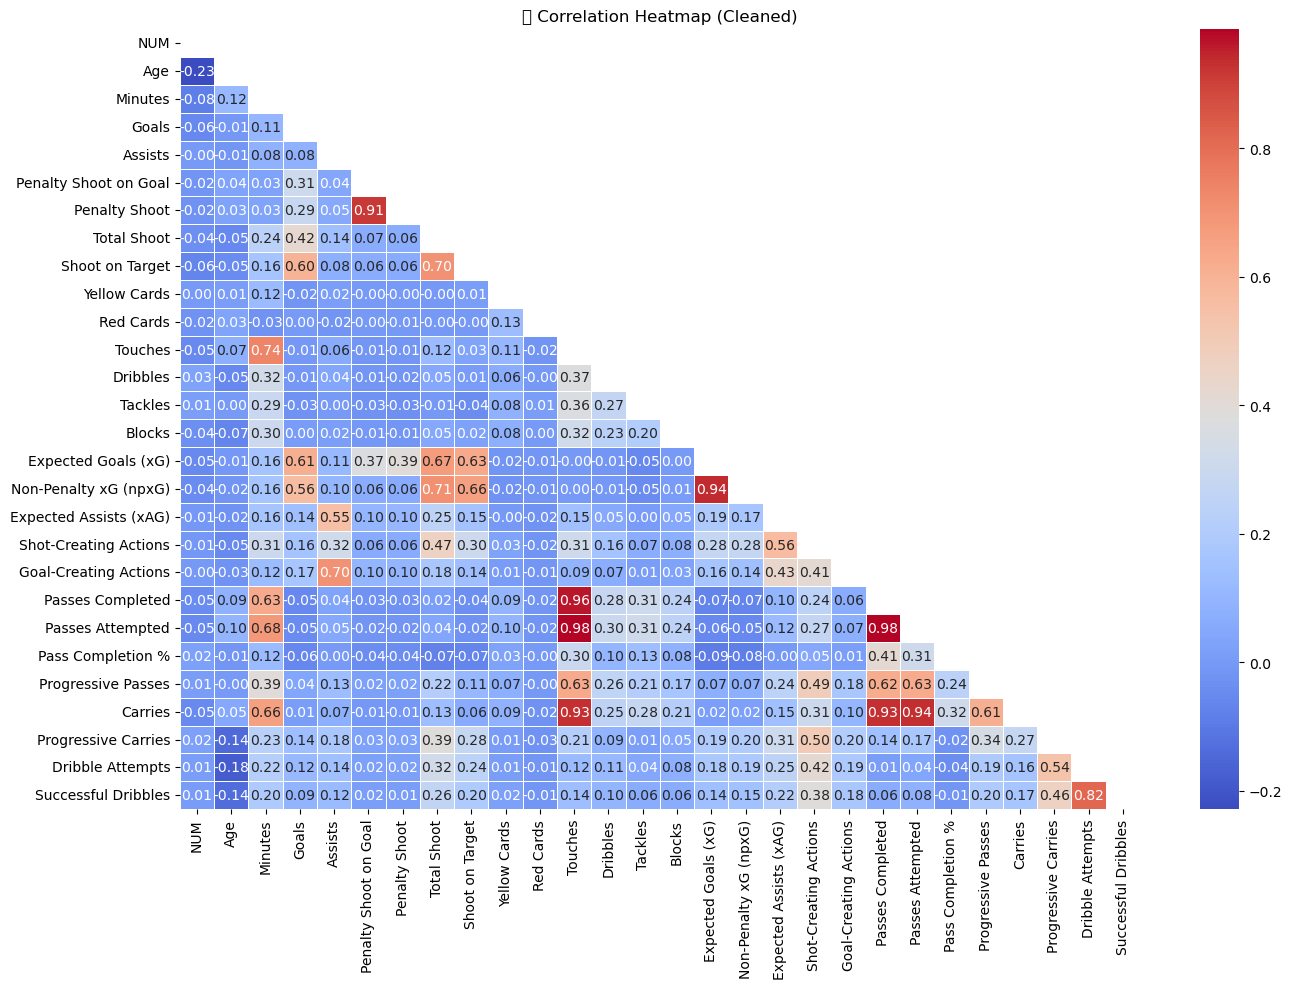

In [20]:
# Get correlation matrix
corr = df.corr(numeric_only=True)

# Create mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap with mask
plt.figure(figsize=(14, 10))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('📊 Correlation Heatmap (Cleaned)')
plt.tight_layout()
plt.show()


In [21]:
# Get full correlation
corr_matrix = df.corr(numeric_only=True)

# Unstack and filter top absolute correlations
top_corrs = corr_matrix.unstack().reset_index()
top_corrs.columns = ['Feature1', 'Feature2', 'Correlation']

# Remove self-correlations and duplicates
top_corrs = top_corrs[top_corrs['Feature1'] != top_corrs['Feature2']]
top_corrs['AbsCorr'] = top_corrs['Correlation'].abs()
top_corrs = top_corrs.sort_values('AbsCorr', ascending=False).drop_duplicates(subset=['Correlation'])

# Show top 10
top_corrs.head(30)


,Feature1,Feature2,Correlation,AbsCorr
581,Passes Completed,Passes Attempted,0.984732,0.984732
329,Touches,Passes Attempted,0.984226,0.984226
571,Passes Completed,Touches,0.963423,0.963423
436,Expected Goals (xG),Non-Penalty xG (npxG),0.940718,0.940718
693,Carries,Passes Attempted,0.936971,0.936971
332,Touches,Carries,0.932364,0.932364
584,Passes Completed,Carries,0.932017,0.932017
146,Penalty Shoot on Goal,Penalty Shoot,0.914918,0.914918
782,Successful Dribbles,Dribble Attempts,0.815422,0.815422
310,Touches,Minutes,0.742024,0.742024


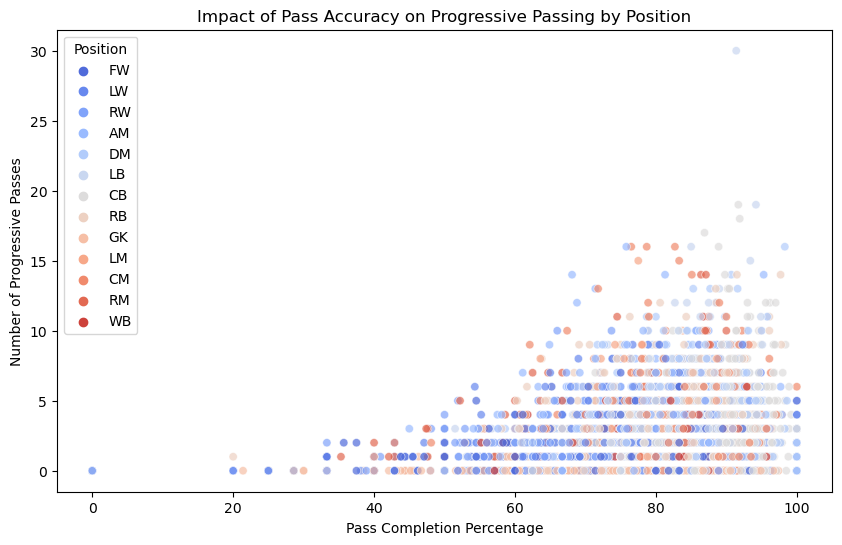

In [22]:
#  Tactical Analysis: Evaluating Passing Accuracy and Ball Progression by Position

import matplotlib.pyplot as plt
import seaborn as sns

#  Scatter plot: Relationship between pass accuracy and progressive passes
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data= df, 
    x='Pass Completion %', 
    y='Progressive Passes', 
    hue='Position', 
    palette='coolwarm', 
    alpha=0.7
)
plt.title('Impact of Pass Accuracy on Progressive Passing by Position')
plt.xlabel('Pass Completion Percentage')
plt.ylabel('Number of Progressive Passes')
plt.legend(title='Position')
plt.show()

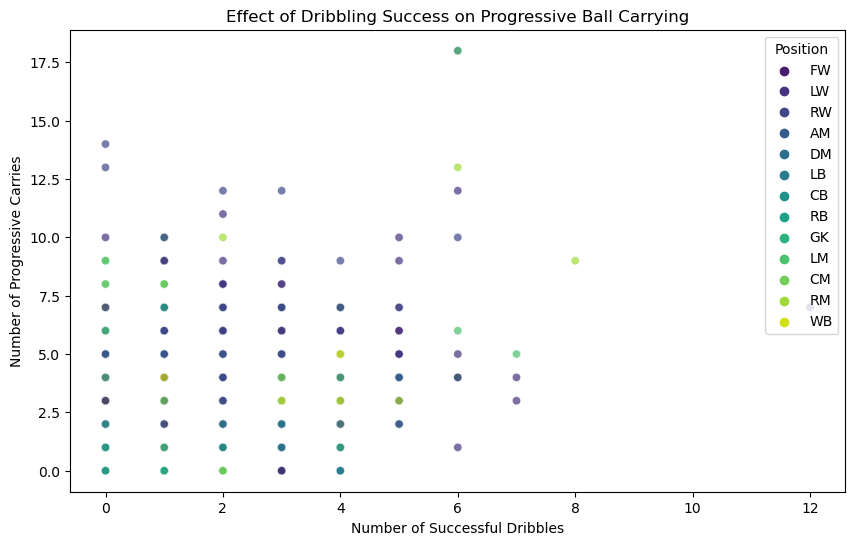

In [23]:
# Scatter plot: Influence of successful dribbles on progressive carries
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Successful Dribbles', 
    y='Progressive Carries', 
    hue='Position', 
    palette='viridis', 
    alpha=0.7
)
plt.title('Effect of Dribbling Success on Progressive Ball Carrying')
plt.xlabel('Number of Successful Dribbles')
plt.ylabel('Number of Progressive Carries')
plt.legend(title='Position')
plt.show()

## Summary of Key Insights & Recommendations

This analysis of Premier League player data provided several valuable insights into individual and team performances across various positions:

- **Top Performers by Role:**  
  - Forwards like [insert top scorer name if desired] stood out as the league's most prolific goal scorers.
  - Midfielders such as [insert top assister name if desired] led in assists, indicating strong creative influence.
  - Defenders with the highest number of tackles demonstrated solid defensive contribution, especially in the full-back and center-back roles.

- **Team Performance Patterns:**  
  - Chelsea emerged as the team with the strongest attacking line based on total goals scored.
  - Defensive metrics suggested key areas where teams vary widely in strength, which may be useful for tactical planning and scouting.

- **Correlation Insights:**  
  - Strong positive correlations were found between:
    - Passes Attempted and Passes Completed
    - Touches and Passes Attempted
    - xG and Non-Penalty xG
    - Progressive actions and passing accuracy  
  These suggest that ball progression and possession are tightly linked to passing efficiency and dribbling success.

- **Tactical Observations:**  
  - Players with higher pass completion percentages tended to contribute more progressive passes, especially in midfield and defensive roles.
  - Successful dribbles were also strongly associated with progressive carries, particularly among wide players and attacking midfielders.

### Recommendations for Further Analysis:
- Incorporate expected goals (xG) and expected assists (xAG) into player performance models.
- Extend analysis to a team-level aggregation for defensive and attacking metrics.
- Use clustering or PCA for dimensionality reduction and player role segmentation.
- Combine with external match results or standings to align performance with team success.

This notebook provides a solid foundation for further tactical and predictive modeling and is suitable for portfolio demonstration, scouting support, or strategic analysis use cases.
